In [1]:
import pandas as pd###数据处理和分析
import sklearn.metrics as metrique###提供了多种评估机器学习模型性能的指标
from pandas import Series###pandas库中的一个重要数据结构，表示一维的标记数组
from sklearn.preprocessing import StandardScaler, MinMaxScaler###pandas库中的一个重要数据结构，表示一维的标记数组
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping###keras.callbacks 模块中的工具，用于在训练神经网络时执行回调操作，如提前停止训练或保存模型
#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
#from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten###keras.layers 中的层，用于构建神经网络的各个部分
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [2]:
data = pd.read_csv('final_feature_all.csv', na_filter=True)
col_del=['all_opnum_1','all_opnum_2','all_opnum_3','all_opnum_4','all_opnum_5','all_opnum_6','all_opnum_7','all_opnum_8','all_opnum_9','all_opnum_10','all_opnum_11','all_opnum_13','all_opnum_14','all_opnum_15','all_opnum_17','all_opnum_21','all_opnum_27',
        'valid_opnum_1','valid_opnum_4','valid_opnum_6','valid_opnum_7','valid_opnum_12','valid_opnum_13','valid_opnum_17','valid_opnum_18','valid_opnum_20','valid_opnum_21','valid_opnum_22','valid_opnum_23','valid_opnum_24','valid_opnum_26','valid_opnum_27','valid_opnum_28','valid_opnum_30',
        'last_minutes_1','last_minutes_2','last_minutes_3','last_minutes_4','last_minutes_5','last_minutes_6','last_minutes_7','last_minutes_8','last_minutes_9','last_minutes_10','last_minutes_11','last_minutes_12','last_minutes_13','last_minutes_14','last_minutes_15','last_minutes_16','last_minutes_17','last_minutes_18','last_minutes_19','last_minutes_20','last_minutes_21','last_minutes_22','last_minutes_23','last_minutes_24','last_minutes_25','last_minutes_26','last_minutes_27','last_minutes_28','last_minutes_29','last_minutes_30',
        'pre_min','pre_max','pre_sum','pre_mean','pre_std','mid_min','mid_max','mid_sum','mid_mean','mid_std','last_min','last_max','last_sum','last_mean','last_std','thirty_day_min','thirty_day_max','thirty_day_sum','thirty_day_mean','thirty_day_std',
        'username','course_id','course_num','nondropout_num','nondropout_num','nondrop_precent','enrollment_id']###从data DataFrame中删除的列的名称
data.head(10)

,enrollment_id,all_opnum_1,all_opnum_2,all_opnum_3,all_opnum_4,all_opnum_5,all_opnum_6,all_opnum_7,all_opnum_8,all_opnum_9,...,thirty_day_max,thirty_day_sum,thirty_day_mean,thirty_day_std,username,course_id,course_num,nondropout_num,nondrop_precent,dropout
0,1,0,0,13,0,0,0,0,24,0,...,67,314,10,18.70,0,28,6,4.0,0.666667,0
1,3,28,0,0,0,3,0,0,30,0,...,64,288,9,18.36,1,9,3,3.0,1.000000,0
2,4,0,0,0,20,11,0,0,0,0,...,20,99,3,5.89,2,28,2,1.0,0.500000,0
3,5,2,0,145,0,0,0,0,0,0,...,145,633,21,40.73,3,9,1,1.0,1.000000,0
4,6,0,0,0,0,0,0,0,0,0,...,17,23,0,3.20,4,22,1,1.0,1.000000,0
5,7,20,0,125,0,0,0,0,0,0,...,125,479,15,31.32,5,9,4,0.0,0.000000,1
6,9,0,0,0,0,0,0,0,0,0,...,28,97,3,7.42,6,28,2,1.0,0.500000,1
7,12,0,0,0,0,0,0,0,0,0,...,22,127,4,6.79,7,28,1,1.0,1.000000,0
8,13,0,0,0,9,0,34,0,0,0,...,173,463,15,35.76,8,4,3,3.0,1.000000,0
9,14,0,0,0,0,0,0,0,0,0,...,23,102,3,6.39,9,28,1,0.0,0.000000,1


In [3]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape
tr_data.head(10)

,all_opnum_12,all_opnum_16,all_opnum_18,all_opnum_19,all_opnum_20,all_opnum_22,all_opnum_23,all_opnum_24,all_opnum_25,all_opnum_26,...,valid_opnum_9,valid_opnum_10,valid_opnum_11,valid_opnum_14,valid_opnum_15,valid_opnum_16,valid_opnum_19,valid_opnum_25,valid_opnum_29,dropout
0,1,67,0,6,17,0,56,4,0,0,...,0,0,4,0,0,28,0,0,0,0
1,0,64,0,12,0,0,0,36,0,0,...,0,0,0,32,0,44,9,0,38,0
2,9,0,0,0,7,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
3,142,8,0,0,0,31,98,47,0,0,...,0,0,7,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
5,0,13,51,0,0,36,10,0,0,0,...,0,0,0,28,49,6,0,0,0,1
6,0,0,7,0,18,0,0,0,28,25,...,0,0,0,0,0,0,0,4,0,1
7,0,17,0,0,6,14,0,14,0,6,...,0,0,0,0,2,3,0,0,0,0
8,0,0,0,0,0,0,64,74,173,47,...,0,0,0,0,0,0,0,94,0,0
9,16,0,0,0,4,10,0,0,0,0,...,0,0,4,1,1,0,0,0,0,1


In [4]:
X = tr_data.drop(['dropout'], axis = 'columns')###从 tr_data 中删除名为 'dropout' 的列。参数 axis = 'columns' 指定了操作是沿着列方向进行的（而不是行方向）
Label_Data = tr_data['dropout']
Label_Data.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    1
Name: dropout, dtype: int64

In [5]:
# Generate and plot imbalanced classification dataset
###生成并可视化一个不平衡分类数据集
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['dropout'])###Counter对象来统计tr_data['dropout']列中每个唯一标签的出现次数
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():###遍历counter对象中的每个项
	row_ix = where(tr_data['dropout'] == label)[0]

Counter({1: 95581, 0: 24961})


In [6]:
###上采样来平衡不均衡数据
# transform the dataset
from imblearn.over_sampling import SMOTE###SMOTE是一种过采样技术，用于生成少数类样本，从而平衡数据集中的类别分布
oversample = SMOTE()
###fit_resample方法首先拟合数据（即计算必要的统计信息），然后对数据进行过采样。
###X是特征数据，tr_data['dropout']是标签数据。
###过采样后，得到的平衡数据集被存储在X_r（重新采样的特征数据）和y（重新采样的标签数据）中
X_r, y = oversample.fit_resample(X, tr_data['dropout'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 95581, 1: 95581})


In [7]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data  数据标准化
X_r2 = StandardScaler().fit_transform(X_r)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [9]:
X_train.shape,y_train.shape 

((133813, 26), (133813,))

In [10]:
X_test.shape,y_test.shape 

((57349, 26), (57349,))

In [11]:
# design network
###准备数据以适应LSTM网络的输入和输出要求，以便进行后续的模型训练和验证。

np.random.seed(7)###设置了NumPy的随机种子为7，以确保随机过程的可复现性

# X_train et X_val sont des dataframe qui contient les features X_train 和 X_val 是包含特征的数据帧
###这些变量将用于后续的LSTM网络训练和验证。注意，这里使用X_test作为验证集，而不是通常意义上的测试集
train_LSTM_X=X_train
val_LSTM_X=X_test


## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM) 将输入重塑为 3D [样本、时间步长、特征]
###通过reshape方法，代码将原始数据从二维（样本数×特征数）转换为三维（样本数×1×特征数）
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels恢复标签
###这两行代码将训练集和验证集的标签分别赋值给train_LSTM_y和val_LSTM_y。这些标签将用于监督LSTM网络的训练过程，并通过比较预测值和实际标签来评估模型的性能
train_LSTM_y=y_train
val_LSTM_y=y_test


In [12]:


 ####定义了一个简单的LSTM（长短期记忆）神经网络模型，用于处理序列数据 
###定义输入层 
inputs = Input(shape=(1, train_LSTM_X.shape[2]))  # 输入层的shape需要与你重塑后的X_train匹配  
###定义第一个LSTM层
#  50：LSTM层的单元数（或称为神经元的数量）。
# dropout=0.3：在每个训练步骤中，随机忽略30%的LSTM单元的输出，以防止过拟合。
# return_sequences=True：返回完整的输出序列，而不是最后一个时间步的输出。这对于堆叠多个LSTM层是必要的。
# recurrent_dropout=0.2：在每个训练步骤中，随机忽略20%的循环连接，以进一步防止过拟合。
x1 = LSTM(50, dropout=0.3,return_sequences=True, recurrent_dropout=0.2)(inputs)  
###定义第二个LSTM层
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)  
###定义输出层
#该层有1个单元（即输出维度为1），并使用sigmoid激活函数。
#sigmoid激活函数将输出限制在0到1之间，这在处理二分类问题时非常有用
outputs = Dense(1, activation='sigmoid')(x2)  
model = Model(inputs, outputs)  

In [13]:
###编译 LSTM 模型，使用二分类交叉熵作为损失函数，使用 Adam 优化器来更新权重，并在训练和验证过程中监控模型的准确率

###loss='binary_crossentropy'指定了模型在训练期间要使用的损失函数   optimizer='adam'指定了模型在训练期间用于更新权重的优化算法
###metrics=['accuracy']指定了在训练和验证期间要监控的指标列表
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
###记录了训练过程中的损失和指标的变化情况
###epochs=100指定了模型训练的轮数。batch_size=20000指定了模型在每次更新权重时所使用的样本数量validation_data=(val_LSTM_X, val_LSTM_y)提供了用于验证的数据集
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
7/7 [==============================] - 9s 376ms/step - loss: 0.6896 - accuracy: 0.6207 - val_loss: 0.6841 - val_accuracy: 0.6979
Epoch 2/100
7/7 [==============================] - 2s 282ms/step - loss: 0.6814 - accuracy: 0.6845 - val_loss: 0.6735 - val_accuracy: 0.7221
Epoch 3/100
7/7 [==============================] - 2s 283ms/step - loss: 0.6705 - accuracy: 0.7025 - val_loss: 0.6586 - val_accuracy: 0.7297
Epoch 4/100
7/7 [==============================] - 2s 314ms/step - loss: 0.6556 - accuracy: 0.7102 - val_loss: 0.6391 - val_accuracy: 0.7334
Epoch 5/100
7/7 [==============================] - 2s 310ms/step - loss: 0.6369 - accuracy: 0.7137 - val_loss: 0.6159 - val_accuracy: 0.7347
Epoch 6/100
7/7 [==============================] - 2s 370ms/step - loss: 0.6157 - accuracy: 0.7153 - val_loss: 0.5919 - val_accuracy: 0.7363
Epoch 7/100
7/7 [==============================] - 2s 355ms/step - loss: 0.5948 - accuracy: 0.7178 - val_loss: 0.5706 - val_accuracy: 0.7386
Epoch 8/100
7

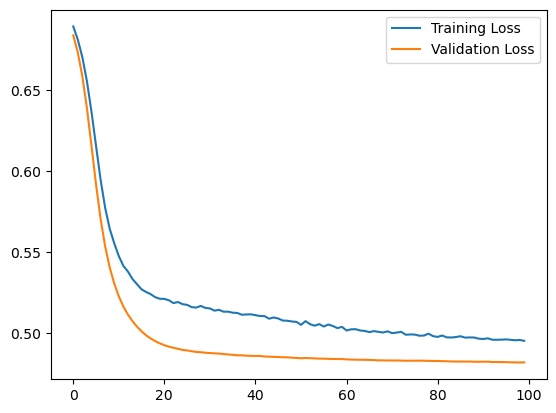

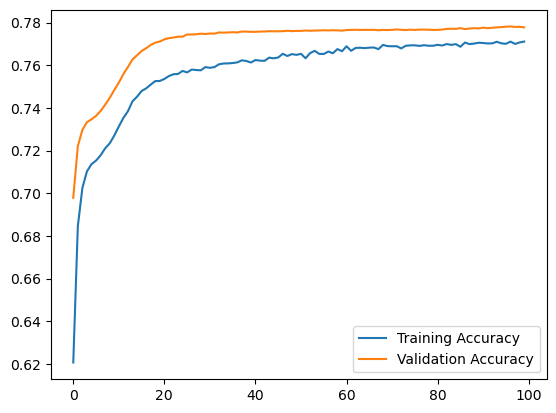

In [15]:
###自己加
# 获取训练过程中的损失值  
train_loss = history.history['loss']  
val_loss = history.history['val_loss']  
  
# 获取训练过程中的准确率  
train_acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
  
# 使用 matplotlib 绘制损失和准确率的曲线  
import matplotlib.pyplot as plt  
  
plt.plot(train_loss, label='Training Loss')  
plt.plot(val_loss, label='Validation Loss')  
plt.legend()  
plt.show()  
  
plt.plot(train_acc, label='Training Accuracy')  
plt.plot(val_acc, label='Validation Accuracy')  
plt.legend()  
plt.show()

In [16]:
# save model and architecture to single file
# model.save('Save_Model.h5')
model.save('Save_Model')###将模型的结构（包括其配置、权重和训练配置）保存到一个名为 'Save_Model' 的文件夹中。这个文件夹将包含多个文件，它们共同描述了你的模型。
print("Saved model to disk")

INFO:tensorflow:Assets written to: Save_Model\assets


INFO:tensorflow:Assets written to: Save_Model\assets


Saved model to disk


In [17]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model# 加载模型 
# model = load_model('Save_Model.h5')
model = load_model('Save_Model')
# summarize model.# 概括模型  
model.summary()  # 打印出模型的摘要，包括每一层的名称、输出形状和参数数量等信息


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 26)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             15400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 35651 (139.26 KB)
Trainable params: 35651 (139.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# evaluate the model评估加载的模型在训练数据集和验证数据集上的性能
### 评估模型在训练数据集上的性能  
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
### 评估模型在验证数据集上的性能 
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
### 打印训练集和验证集上的准确率 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.778, Test: 0.778


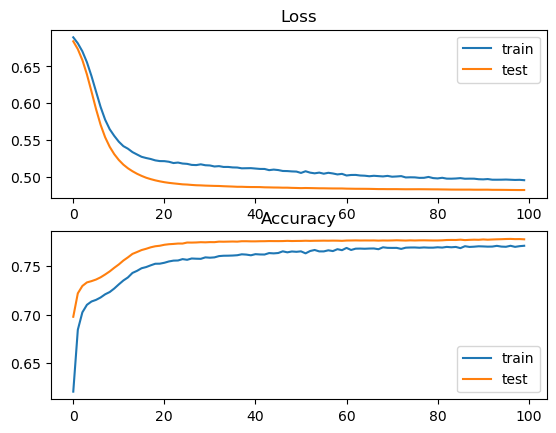

In [19]:
# plot loss during training
pyplot.subplot(211)### 创建一个 2x1 的子图网格，并选择第一个位置（从上到下，从左到右）  
pyplot.title('Loss')### 设置子图的标题为 'Loss' 
pyplot.plot(history.history['loss'], label='train')### 绘制训练过程中的损失变化，标签为 'train' 
pyplot.plot(history.history['val_loss'], label='test')### 绘制验证过程中的损失变化，标签为 'test' 
pyplot.legend()### 显示图例
# plot accuracy during training

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

In [20]:
# predict probabilities for test set
###用于预测测试集（在这里是验证集 val_LSTM_X）的概率，并将这些概率转换为整数标签，
###然后与真实的验证集标签 val_LSTM_y 进行比较
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array将概率降维为 1D 数组
yhat_probs = yhat_probs[:, 0]
yhat_probs = np.around(yhat_probs,0).astype(int)#.around()是四舍五入的函数 第二个参数0表示保留0位小数，也就只保留整数！！ .astype(int) 将浮点数转化为int型
print(yhat_probs)
print("\n")
print(val_LSTM_y)

[0 1 1 ... 1 0 0]


126531    0
130875    0
171512    0
5788      1
112296    1
         ..
123714    0
31802     1
77376     1
16372     1
15641     1
Name: dropout, Length: 57349, dtype: int64


In [40]:
# demonstration of calculating metrics for a neural network model using sklearn
###计算神经网络模型在验证集上的性能指标。这些指标包括准确率（accuracy）、精确率（precision）和召回率（recall）
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score  
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)准确率是分类器正确分类的样本数与总样本数之比
accuracy = accuracy_score(val_LSTM_y, yhat_probs)
print('Accuracy_Lstm: %f' % accuracy)
# precision tp / (tp + fp)精确率是针对预测为正类的样本而言的，它表示实际为正类的样本占预测为正类样本的比例
###精确率越高，说明模型预测为正类的样本中，真正为正类的样本比例越高
precision = precision_score(val_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)召回率也称为真正率（True Positive Rate, TPR），它表示实际为正类的样本中被预测为正类的比例。
###召回率越高，说明模型能够找出更多实际为正类的样本
recall = recall_score(val_LSTM_y, yhat_probs)
print('Recall: %f' % recall)
f1 = f1_score(val_LSTM_y, yhat_probs)  
print('f1_score: %f' % f1)

Accuracy_Lstm: 0.777799
Precision: 0.735676
Recall: 0.867854
f1_score: 0.796317


In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs)

In [24]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Nondropout','Dropout']

Confusion matrix, without normalization
[[19696  8950]
 [ 3793 24910]]


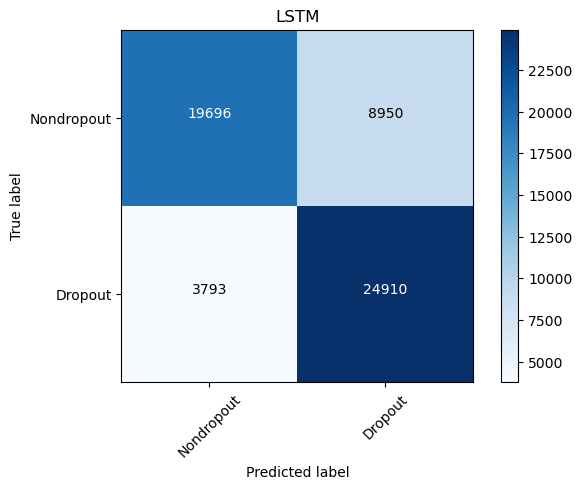

In [25]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')

In [26]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [27]:
# inputs1=Input((1,9))
inputs1 = Input(shape=(1, train_LSTM_X.shape[2]))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [28]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
5/5 [==============================] - 10s 578ms/step - loss: 0.6909 - accuracy: 0.6131 - val_loss: 0.6867 - val_accuracy: 0.7029
Epoch 2/100
5/5 [==============================] - 4s 616ms/step - loss: 0.6853 - accuracy: 0.6843 - val_loss: 0.6801 - val_accuracy: 0.7249
Epoch 3/100
5/5 [==============================] - 3s 559ms/step - loss: 0.6790 - accuracy: 0.7015 - val_loss: 0.6721 - val_accuracy: 0.7293
Epoch 4/100
5/5 [==============================] - 2s 470ms/step - loss: 0.6711 - accuracy: 0.7093 - val_loss: 0.6620 - val_accuracy: 0.7325
Epoch 5/100
5/5 [==============================] - 2s 398ms/step - loss: 0.6612 - accuracy: 0.7123 - val_loss: 0.6493 - val_accuracy: 0.7341
Epoch 6/100
5/5 [==============================] - 2s 374ms/step - loss: 0.6493 - accuracy: 0.7141 - val_loss: 0.6341 - val_accuracy: 0.7345
Epoch 7/100
5/5 [==============================] - 2s 376ms/step - loss: 0.6350 - accuracy: 0.7154 - val_loss: 0.6171 - val_accuracy: 0.7351
Epoch 8/100


In [31]:
# save Attention model and architecture to single file
# model1.save('Save_Model_Attention.h5')
model1.save('Save_Model_Attention')
print("Saved model to disk")

INFO:tensorflow:Assets written to: Save_Model_Attention\assets


INFO:tensorflow:Assets written to: Save_Model_Attention\assets


Saved model to disk


In [32]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
# model1 = load_model('Save_Model_Attention.h5')
model1 = load_model('Save_Model_Attention')
# summarize model.
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 26)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             15400     
                                                                 
 lstm_3 (LSTM)               (None, 1, 50)             20200     
                                                                 
 attention (attention)       (None, 50)                51        
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 35702 (139.46 KB)
Trainable params: 35702 (139.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.776, Test: 0.777


In [34]:
# predict probabilities for test set
yhat_probs1 = model1.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]
yhat_probs1 = np.around(yhat_probs1,0).astype(int)

In [41]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
print('Accuracy_Lstm-Attention: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs1)
print('Recall: %f' % recall)
f1 = f1_score(val_LSTM_y, yhat_probs)  
print('f1_score: %f' % f1)

Accuracy_Lstm-Attention: 0.776875
Precision: 0.736718
Recall: 0.862384
f1_score: 0.796317


In [36]:
cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)

Confusion matrix, without normalization
[[19800  8846]
 [ 3950 24753]]


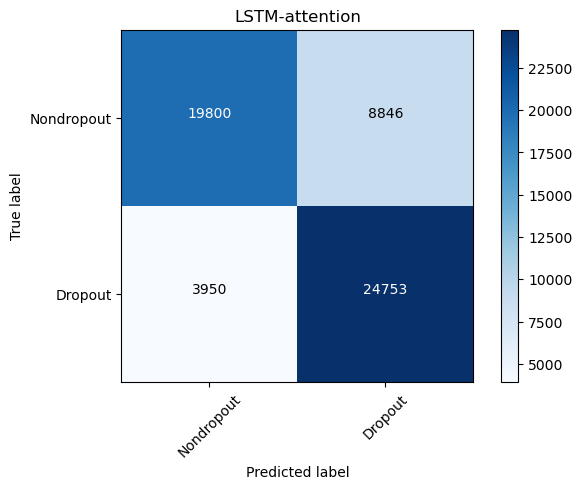

In [37]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-attention', normalize=False)